In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

#Displaying more rows and co#lumns
#pd.set_option('display.max_rows', 500)
#pd.set_option('display.max_columns', 500)

# Project Understanding

**Kaggle 2020 Survey**
- Notes
    - Gender diff
    - Diff skills by position
    - Pay diff based on skills (tools, coding abiity, languages)
    - Whta opportunities come from higher education
    - What did people leave blank the most 

# Data Understanding

## Basic

In [2]:
panda = pd.read_csv('./file/kaggle_survey_2020_responses.csv')
panda.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
panda.describe()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
count,20037,20037,20037,20037,19570,19278,19121,15531,4278,7536,...,1178,495,431,3200,558,481,847,520,3083,252
unique,5168,12,6,56,8,14,8,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,565,25-29,Man,India,Master’s degree,Student,3-5 years,Python,R,SQL,...,Weights & Biases,Comet.ml,Sacred + Omniboard,TensorBoard,Guild.ai,Polyaxon,Trains,Domino Model Monitor,None,Other
freq,34,4011,15789,5851,7859,5171,4546,15530,4277,7535,...,1177,494,430,3199,557,480,846,519,3082,251


In [4]:
# Function
def missing_data(data):
    """
    This function calculates missing data for each column in a pandas dataframe.
    It returns a pandas dataframe containing the column name, the number of missing values,
    the percentage of missing values, the data type of the column, and the set of unique values
    for that column.
    
    :param data: A pandas dataframe
    :return: A pandas dataframe
    """
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [5]:
def unique_values(data):
    """
    This function takes a pandas dataframe as input and returns a transposed
    pandas dataframe that lists the total number of observations and the number
    of unique values for each column.
    
    Parameters:
    -----------
    data: A pandas dataframe.
    
    Returns:
    --------
    A transposed pandas dataframe that lists the total number of observations
    and the number of unique values for each column.
    """
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    return(np.transpose(tt))

In [6]:
#remove the top row
pan = panda.iloc[1:,:]
pan.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,78,30-34,Man,Japan,Master’s degree,Software Engineer,3-5 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
missing_data(pan)

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
Total,0,0,0,0,467,759,916,4506,15759,12501,...,18859,19542,19606,16837,19479,19556,19190,19517,16954,19785
Percent,0.0,0.0,0.0,0.0,2.330805,3.788181,4.571771,22.489519,78.653424,62.392693,...,94.125574,97.534438,97.853863,84.033739,97.220004,97.604312,95.7776,97.409663,84.617688,98.747255
Types,object,object,object,object,object,object,object,object,object,object,...,object,object,object,object,object,object,object,object,object,object


## Cleaning the data

**Making data useful**
- Putting the questions in a dictionary

In [8]:
# Create a dictionary
Questions = {}

# Splitting the dataset by the _
qnums = list(dict.fromkeys([i.split('_')[0] for i in pan.columns]))

- Each key in the dictionary is the question number and each value is a datafram with the questions.
- This makes it easier to pull parts of a question.

In [9]:
# Add data for each question to key value pairs in a dictionary
for i in qnums:
    if i in ['Q1', 'Q2', 'Q3']:
        Questions[i] = pan[i] #[1,2,3] from going in the key value pair
    else:
        Questions[i] = pan[[q for q in pan.columns if q.startswith(i)]]

# Data Viz

In [14]:
pan.head(n=2)

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
pan.Q1.value_counts()

25-29    4011
22-24    3786
18-21    3469
30-34    2811
35-39    1991
40-44    1397
45-49     988
50-54     698
55-59     411
60-69     398
70+        76
Name: Q1, dtype: int64

## Question: How many people do coding based on age

In [26]:
Questions['Q1']

1        35-39
2        30-34
3        35-39
4        30-34
5        30-34
         ...  
20032    18-21
20033    55-59
20034    30-34
20035    22-24
20036    22-24
Name: Q1, Length: 20036, dtype: object

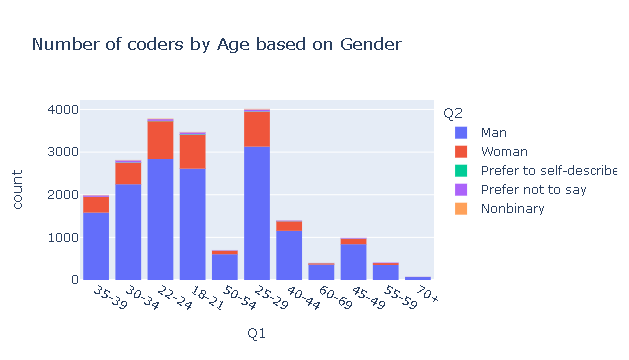

In [55]:
fig = px.histogram(pan, x='Q1', y=''
                   title='Number of coders by Age based on Gender', color='Q2')
fig.show()

## Question: How many years of coding experience does each person have based on age

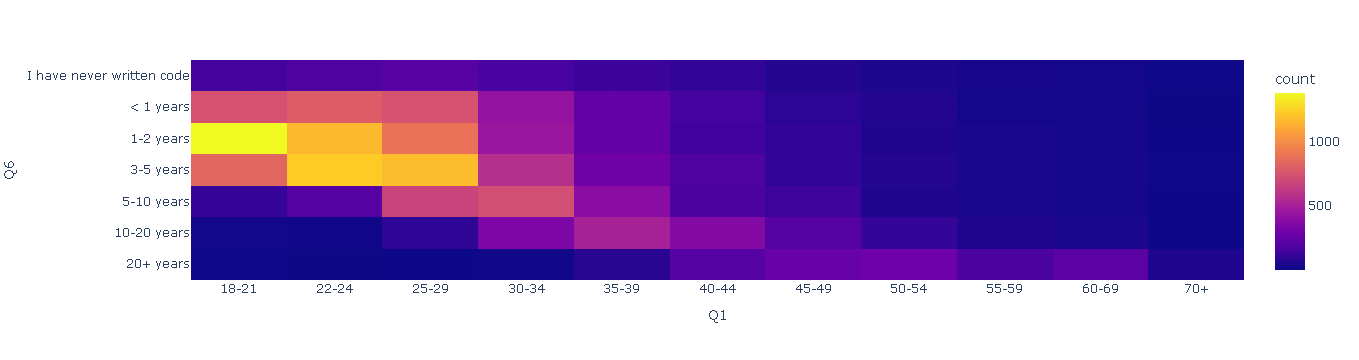

In [16]:
fig = px.density_heatmap(pan, x='Q1', y='Q6', 
                         category_orders={'Q1':['18-21', '22-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-69', '70+'], 
                                          'Q6':['I have never written code', '< 1 years', '1-2 years', '3-5 years', '5-10 years', '10-20 years', '20+ years']})
fig.show()

## Question: What languages are most people using the most

In [27]:
Questions['Q7']

,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER
1,Python,R,SQL,C,NaN,NaN,Javascript,NaN,NaN,NaN,MATLAB,NaN,Other
2,Python,R,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,Java,Javascript,NaN,NaN,Bash,NaN,NaN,NaN
4,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,Bash,NaN,NaN,NaN
5,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20033,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20034,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20035,Python,NaN,SQL,C,NaN,Java,Javascript,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
Questions['Q7'].count()

Q7_Part_1     15530
Q7_Part_2      4277
Q7_Part_3      7535
Q7_Part_4      3315
Q7_Part_5      3827
Q7_Part_6      3367
Q7_Part_7      2995
Q7_Part_8       262
Q7_Part_9       198
Q7_Part_10     1776
Q7_Part_11     2217
Q7_Part_12      206
Q7_OTHER       1945
dtype: int64

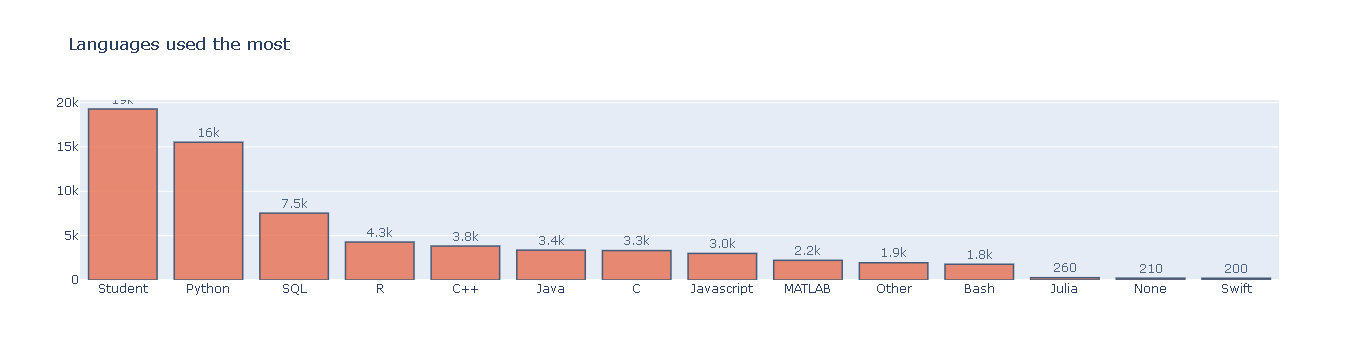

In [63]:
#* Aggregate the data and group them by (language, count)
Questions['Q7'].columns = list(Questions['Q7'].mode().values)
q7 = Questions['Q7'].count().reset_index()

#* Rename the columns
q7.columns = ['Language', 'Count']

#* Sort them in descending order
q7 = q7.sort_values('Count', ascending=False)

#* Plot the dataset using go
fig = go.Figure([go.Bar(x=q7.Language, y=q7.Count, text=q7.Count)])
fig.update_traces(marker_color='#e76f51', marker_line_color='#1d3557',
                  marker_line_width=1.5, opacity=0.8, texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(title_text='Languages used the most')
fig.show()

## Roles

In [38]:
# Get unique values
Roles = {}
for i in pan.Q5.unique():
    Roles[i] = pan[pan.Q5 == i]

In [39]:
Roles.keys()

dict_keys(['Student', 'Data Engineer', 'Software Engineer', 'Data Scientist', 'Data Analyst', 'Research Scientist', 'Other', 'Currently not employed', 'Statistician', 'Product/Project Manager', 'Machine Learning Engineer', nan, 'Business Analyst', 'DBA/Database Engineer'])

In [40]:
Roles['Student']

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
7,748,22-24,Man,Brazil,Bachelor’s degree,Student,3-5 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,171196,25-29,Woman,China,Master’s degree,Student,< 1 years,NaN,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,150,22-24,Man,China,No formal education past high school,Student,< 1 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,7469,18-21,Man,India,Bachelor’s degree,Student,1-2 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20017,374,18-21,Prefer not to say,China,Bachelor’s degree,Student,1-2 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20021,238,18-21,Woman,United States of America,Bachelor’s degree,Student,3-5 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20024,221,18-21,Man,India,Bachelor’s degree,Student,3-5 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20026,1158,22-24,Man,United States of America,Master’s degree,Student,1-2 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Education level by role

In [42]:
# Education levels
edu = pan.Q4.value_counts()

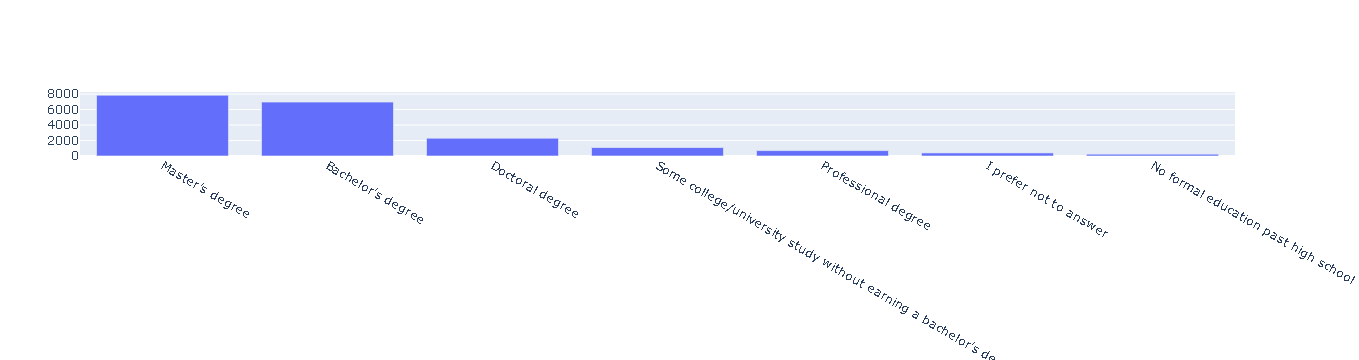

In [43]:
# Plotting all education levels
#* Using Go
fig = go.Figure([go.Bar(x=edu.index, y=edu.values)])
fig.show()

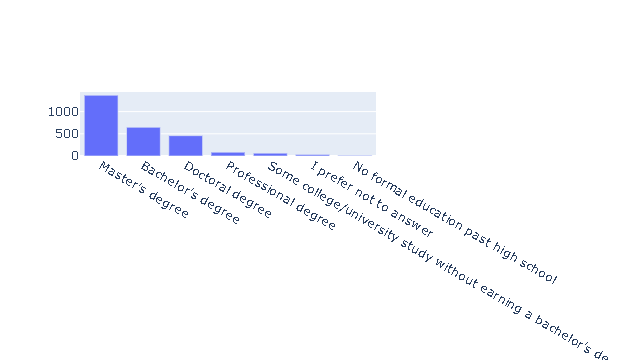

In [40]:
# Plotting data scientist
ds_edu = Roles['Data Scientist'].Q4.value_counts()
fig = go.Figure([go.Bar(x=ds_edu.index, y=ds_edu.values)])
fig.show()

# Advanced Graph - [Dropdowns](https://plotly.com/python/dropdowns)
- Comparing Education by Position

### First try

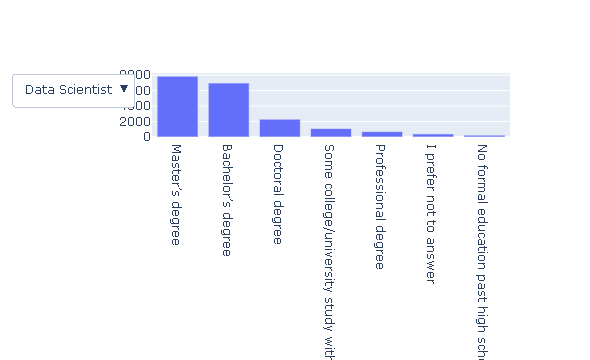

In [42]:
fig = go.Figure()
fig.add_trace(go.Bar(x=edu.index, y=edu.values))

#! Note: This is only the first attempt of a basic dropdown
#* Create a dropdown 
buttons = []
buttons.append(dict(method='restyle',
                    label='Data Scientist',
                    visible=True,
                    args=[{'y': [Roles['Data Scientist'].Q4.value_counts().values],
                           'x': [Roles['Data Scientist'].Q4.value_counts().index],
                           'type': 'bar'}, [0]]
                    )
               )
buttons.append(dict(method='restyle',
                    label='Student',
                    visible=True,
                    args=[{'y': [Roles['Student'].Q4.value_counts().values],
                           'x': [Roles['Student'].Q4.value_counts().index],
                           'type': 'bar'}, [0]]
                    )
               )
buttons.append(dict(method='restyle',
                    label='Data Analyst',
                    visible=True,
                    args=[{'y': [Roles['Data Analyst'].Q4.value_counts().values],
                           'x': [Roles['Data Analyst'].Q4.value_counts().index],
                           'type': 'bar'}, [0]]
                    )
               )

#* Attempt1: To show a menu, create an updatemenu
updatemenu = []
y_menu = {}
updatemenu.append(y_menu)

updatemenu[0]['buttons'] = buttons
updatemenu[0]['direction'] = 'down'
updatemenu[0]['showactive'] = True

#* Add menu to the figure and plot
fig.update_layout(showlegend=False, updatemenus=updatemenu)
fig.show()

### Second try

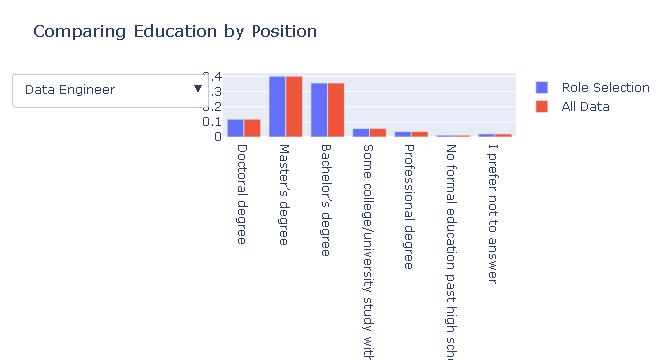

In [49]:
#Add a title 
fig = go.Figure(layout=go.Layout(title= go.layout.Title(text="Comparing Education by Position")))

#* Change to % of group rather than raw numbers
fig.add_trace(go.Bar(name= 'Role Selection', x= edu.index, y=(edu.values/ edu.values.sum())))

#* Second trace bar 
fig.add_trace(go.Bar(name= 'All Data',x= edu.index, y=(edu.values/ edu.values.sum())))

#* Add all roles with a loop
buttons = []
for i in list(Roles.keys())[1:]:
    buttons.append(dict(method='restyle',
                        label= i,
                        visible=True,
                        args=[{'y':[Roles[i].Q4.value_counts().values/Roles[i].Q4.value_counts().values.sum()],
                               'x':[Roles[i].Q4.value_counts().index],
                               'type':'bar'}, [0]],
                        )
                  )


#* Add dropdown 
updatemenu = []
your_menu = {}
updatemenu.append(your_menu)

updatemenu[0]['buttons'] = buttons
updatemenu[0]['direction'] = 'down'
updatemenu[0]['showactive'] = True

#* Add dropdown menus to the figure
fig.update_layout( updatemenus=updatemenu)

#* Order axes https://plotly.com/python/categorical-axes/
fig.update_xaxes(categoryorder= 'array', categoryarray= ["Doctoral degree",'Master’s degree','Bachelor’s degree','Some college/university study without earning a bachelor’s degree',"Professional degree","No formal education past high school","I prefer not to answer"])
fig.show()

### Third try

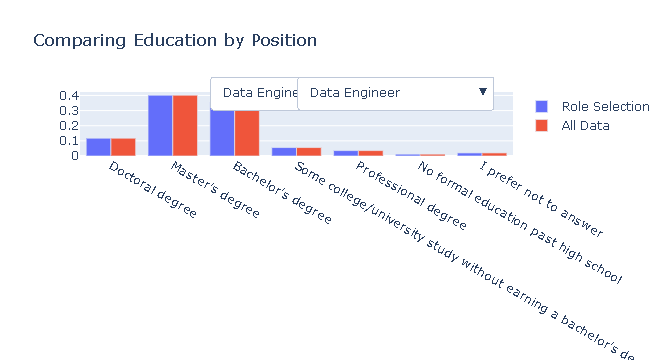

In [61]:
# Third
fig = go.Figure(layout=go.Layout(title= go.layout.Title(text="Comparing Education by Position")))
fig.add_trace(go.Bar(name= 'Role Selection', x= edu.index, y=(edu.values/ edu.values.sum())))

#* Add buttons for first series of bars
buttons = []
for i in list(Roles.keys())[1:]:
    buttons.append(dict(method='restyle',
                        label= i,
                        visible=True,
                        args=[{'y':[Roles[i].Q4.value_counts().values/Roles[i].Q4.value_counts().values.sum()],
                               'x':[Roles[i].Q4.value_counts().index],
                               'type':'bar'}, [0]], #? the [0] at the end lets us know they are for the first trace
                        )
                  )
fig.add_trace(go.Bar(name= 'All Data',x= edu.index, y=(edu.values/ edu.values.sum())))

#* Add buttons for second series of bars
buttons2 = []               
for i in list(Roles.keys())[1:]:
    buttons2.append(dict(method='restyle',
                        label= i,
                        visible=True,
                        args=[{'y':[Roles[i].Q4.value_counts().values/Roles[i].Q4.value_counts().values.sum()],
                               'x':[Roles[i].Q4.value_counts().index],
                               'type':'bar'}, [1]], #? the [1] at the end lets us know they are for the second trace
                        )                     
                  )

#* Adjusted dropdown placement
# https://plotly.com/python/dropdowns/
#? Updatemenus takes a dictionary of buttons and allows you to format how the dropdown looks etc.
button_layer_1_height = 1.40
updatemenus = list([
    dict(buttons=buttons,
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.3,
            xanchor="left",
            y=button_layer_1_height,
            yanchor="top"),
    dict(buttons=buttons2,
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.5,
            xanchor="left",
            y=button_layer_1_height,
            yanchor="top")])
 
fig.update_layout( updatemenus=updatemenus)
fig.update_xaxes(categoryorder= 'array', categoryarray= ["Doctoral degree",'Master’s degree','Bachelor’s degree','Some college/university study without earning a bachelor’s degree',"Professional degree","No formal education past high school","I prefer not to answer"])
fig.show()

#add topline to each for all types
# add seleciton 1 and selection 2

### Final

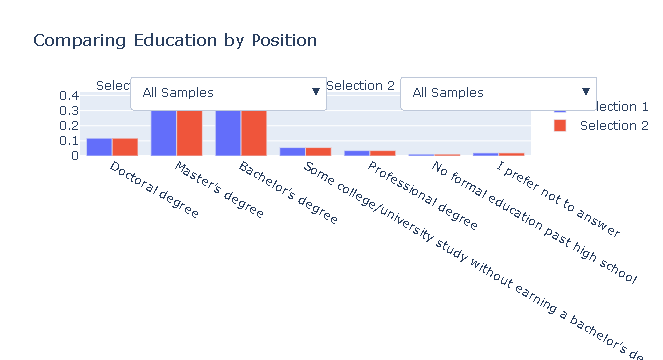

In [72]:
fig = go.Figure(layout=go.Layout(title= go.layout.Title(text="Comparing Education by Position")))
#* Changed from role selection to selection 1
fig.add_trace(go.Bar(name= 'Selection 1', x= edu.index, y=(edu.values/ edu.values.sum())))

#* Add button for all data comparison
buttons = []
buttons.append(dict(method='restyle',
                        label= 'All Samples',
                        visible=True,
                        args=[{'y':[pan.Q4.value_counts().values/pan.Q4.value_counts().values.sum()],
                               'x':[pan.Q4.value_counts().index],
                               'type':'bar'}, [0]], # the [0] at the end lets us know they are for the first trace
                        )
                  )

for i in list(Roles.keys())[1:]:
    buttons.append(dict(method='restyle',
                        label= i,
                        visible=True,
                        args=[{'y':[Roles[i].Q4.value_counts().values/Roles[i].Q4.value_counts().values.sum()],
                               'x':[Roles[i].Q4.value_counts().index],
                               'type':'bar'}, [0]], # the [0] at the end lets us know they are for the first trace
                        )
                  )

fig.add_trace(go.Bar(name= 'Selection 2',x= edu.index, y=(edu.values/ edu.values.sum())))

buttons2 = []
#added button for all data comparison
buttons2.append(dict(method='restyle',
                        label= 'All Samples',
                        visible=True,
                        args=[{'y':[pan.Q4.value_counts().values/pan.Q4.value_counts().values.sum()],
                               'x':[pan.Q4.value_counts().index],
                               'type':'bar'}, [1]], # the [0] at the end lets us know they are for the first trace
                        )
                  )

for i in list(Roles.keys())[1:]:
    buttons2.append(dict(method='restyle',
                        label= i,
                        visible=True,
                        args=[{'y':[Roles[i].Q4.value_counts().values/Roles[i].Q4.value_counts().values.sum()],
                               'x':[Roles[i].Q4.value_counts().index],
                               'type':'bar'}, [1]], # the [1] at the end lets us know they are for the first trace
                        )                        #literally figured that out by just experimenting 
                  )

#* Adjusted dropdown placement 
# https://plotly.com/python/dropdowns/
button_layer_1_height = 1.40
updatemenus = list([
    dict(buttons=buttons,
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.11,
            xanchor="left",
            y=button_layer_1_height,
            yanchor="top"),
    dict(buttons=buttons2,
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.71,
            xanchor="left",
            y=button_layer_1_height,
            yanchor="top")])
    
fig.update_layout( updatemenus=updatemenus)
#* Added annotations next to dropdowns 
fig.update_layout(
    annotations=[
        dict(text="Selection 1", x=0.03, xref="paper", y=1.25, yref="paper",
                             align="left", showarrow=False),
        dict(text="Selection 2", x=0.70, xref="paper", y=1.25,
                             yref="paper", showarrow=False)
    ])
fig.update_xaxes(categoryorder= 'array', categoryarray= ["Doctoral degree",'Master’s degree','Bachelor’s degree','Some college/university study without earning a bachelor’s degree',"Professional degree","No formal education past high school","I prefer not to answer"])
fig.show()

# Advanced Graphs
- Comparing programming languages, IDE, etc by Role

## Coding Languages

In [45]:
Questions['Q7']['Roles'] = pan.Q5

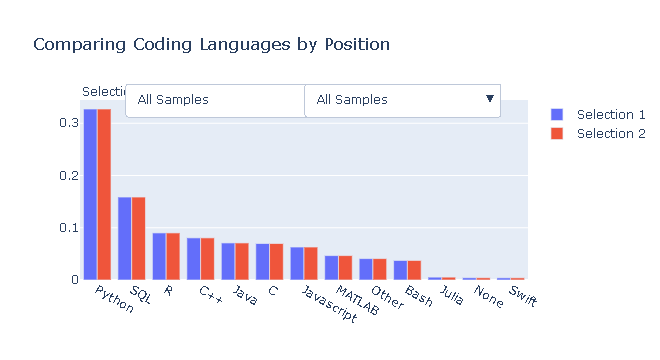

In [44]:

fig = go.Figure(layout=go.Layout(title= go.layout.Title(text="Comparing Coding Languages by Position")))

#* Add a text called selection 1
fig.add_trace(go.Bar(name= 'Selection 1', x= q7.Language, y=(q7.Count/ q7.Count.sum())))

def filter_bars(role, data):
    df = data[data['Roles'] == role]
    q7 = df.drop('Roles', axis= 1).count().reset_index()
    q7.columns = ['Language','Count']
    return (q7.Language, q7.Count/q7.Count.sum())

#* Button 1
buttons = []
buttons.append(dict(method='restyle',
                        label= 'All Samples',
                        visible=True,
                        args=[{'y':[(q7.Count/ q7.Count.sum())],
                               'x':[q7.Language],
                               'type':'bar'}, [0]], # the [0] at the end lets us know they are for the first trace
                        )
                  )
for i in list(Roles.keys())[1:]:
    buttons.append(dict(method='restyle',
                        label= i,
                        visible=True,
                        args=[{'y':[filter_bars(i,Questions['Q7'])[1].values],
                               'x':[filter_bars(i,Questions['Q7'])[0].values],
                               'type':'bar'}, [0]], # the [0] at the end lets us know they are for the first trace
                        )
                  )
fig.add_trace(go.Bar(name= 'Selection 2', x= q7.Language, y=(q7.Count/ q7.Count.sum())))

#* Button 2
buttons2 = []
buttons2.append(dict(method='restyle',
                        label= 'All Samples',
                        visible=True,
                        args=[{'y':[(q7.Count/ q7.Count.sum())],
                               'x':[q7.Language],
                               'type':'bar'}, [1]], # the [0] at the end lets us know they are for the first trace
                        )
                  )
for j in list(Roles.keys())[1:]:
    buttons2.append(dict(method='restyle',
                        label= j,
                        visible=True,
                        args=[{'y':[filter_bars(j,Questions['Q7'])[1].values],
                               'x':[filter_bars(j,Questions['Q7'])[0].values],
                               'type':'bar'}, [1]], # the [1] at the end lets us know they are for the first trace
                        )                        #literally figured that out by just experimenting 
                  )

#* Dropdown placement 
button_layer_1_height = 1.15
updatemenus = list([
    dict(buttons=buttons,
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=button_layer_1_height,
            yanchor="top"),
    dict(buttons=buttons2,
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.50,
            xanchor="left",
            y=button_layer_1_height,
            yanchor="top")])
    
fig.update_layout(updatemenus=updatemenus)
#added annotations next to dropdowns 
fig.update_layout(
    annotations=[
        dict(text="Selection 1", x=0, xref="paper", y=1.1, yref="paper",
                             align="left", showarrow=False),
        dict(text="Selection 2", x=0.45, xref="paper", y=1.1,
                             yref="paper", showarrow=False)
    ])
fig.update_xaxes(categoryorder='array', categoryarray=q7.Language)
fig.show()

## IDE's

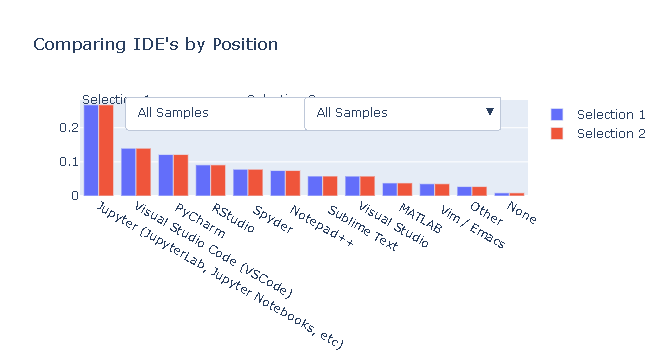

In [46]:
Questions['Q9'].columns = list(Questions['Q9'].mode().iloc[0,:])
q9 = Questions['Q9'].count().reset_index()
q9.columns = ['language','Count']
q9 = q9.sort_values('Count', ascending = False)

Questions['Q9']['Roles'] = pan.Q5

fig = go.Figure(layout=go.Layout(title= go.layout.Title(text="Comparing IDE's by Position")))
#* Add selection 1
fig.add_trace(go.Bar(name= 'Selection 1', x= q9.language, y=(q9.Count/ q9.Count.sum())))

buttons = []

#* Add button for all data comparison
buttons.append(dict(method='restyle',
                        label= 'All Samples',
                        visible=True,
                        args=[{'y':[(q9.Count/ q9.Count.sum())],
                               'x':[q9.language],
                               'type':'bar'}, [0]], # the [0] at the end lets us know they are for the first trace
                        )
                  )

for i in list(Roles.keys())[1:]:
    buttons.append(dict(method='restyle',
                        label= i,
                        visible=True,
                        args=[{'y':[filter_bars(i,Questions['Q9'])[1].values],
                               'x':[filter_bars(i,Questions['Q9'])[0].values],
                               'type':'bar'}, [0]], # the [0] at the end lets us know they are for the first trace
                        )
                  )

fig.add_trace(go.Bar(name= 'Selection 2', x= q9.language, y=(q9.Count/ q9.Count.sum())))

buttons2 = []
#added button for all data comparison
buttons2.append(dict(method='restyle',
                        label= 'All Samples',
                        visible=True,
                        args=[{'y':[(q9.Count/ q9.Count.sum())],
                               'x':[q9.language],
                               'type':'bar'}, [1]], # the [0] at the end lets us know they are for the first trace
                        )
                  )

for j in list(Roles.keys())[1:]:
    buttons2.append(dict(method='restyle',
                        label= j,
                        visible=True,
                        args=[{'y':[filter_bars(j,Questions['Q9'])[1].values],
                               'x':[filter_bars(j,Questions['Q9'])[0].values],
                               'type':'bar'}, [1]], # the [1] at the end lets us know they are for the first trace
                        )                        #literally figured that out by just experimenting 
                  )

#* Adjusted dropdown placement 
button_layer_1_height = 1.15
updatemenus = list([
    dict(buttons=buttons,
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=button_layer_1_height,
            yanchor="top"),
    dict(buttons=buttons2,
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.50,
            xanchor="left",
            y=button_layer_1_height,
            yanchor="top")])
    
fig.update_layout( updatemenus=updatemenus)
#added annotations next to dropdowns 
fig.update_layout(
    annotations=[
        dict(text="Selection 1", x=0, xref="paper", y=1.1, yref="paper",
                             align="left", showarrow=False),
        dict(text="Selection 2", x=0.45, xref="paper", y=1.1,
                             yref="paper", showarrow=False)
    ])
fig.update_xaxes(categoryorder= 'array', categoryarray= q9.language)
fig.show()

## Recommendation

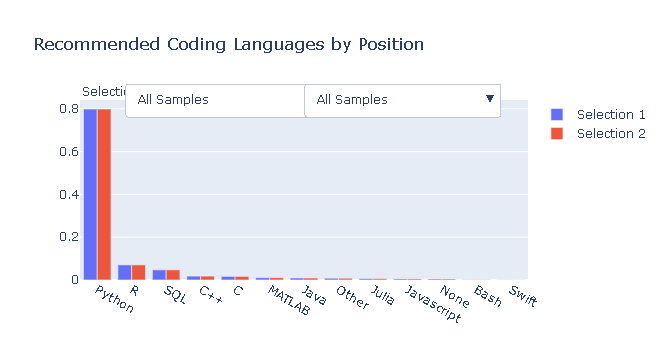

In [47]:
edu2 = pan.Q8.value_counts()
fig = go.Figure(layout=go.Layout(title= go.layout.Title(text="Recommended Coding Languages by Position")))
#changed from role selection to selection 1
fig.add_trace(go.Bar(name= 'Selection 1', x= edu2.index, y=(edu2.values/ edu2.values.sum())))

buttons = []

#added button for all data comparison
buttons.append(dict(method='restyle',
                        label= 'All Samples',
                        visible=True,
                        args=[{'y':[pan.Q8.value_counts().values/pan.Q8.value_counts().values.sum()],
                               'x':[pan.Q8.value_counts().index],
                               'type':'bar'}, [0]], # the [0] at the end lets us know they are for the first trace
                        )
                  )

for i in list(Roles.keys())[1:]:
    buttons.append(dict(method='restyle',
                        label= i,
                        visible=True,
                        args=[{'y':[Roles[i].Q8.value_counts().values/Roles[i].Q8.value_counts().values.sum()],
                               'x':[Roles[i].Q8.value_counts().index],
                               'type':'bar'}, [0]], # the [0] at the end lets us know they are for the first trace
                        )
                  )

fig.add_trace(go.Bar(name= 'Selection 2',x= edu2.index, y=(edu2.values/ edu2.values.sum())))

buttons2 = []
#added button for all data comparison
buttons2.append(dict(method='restyle',
                        label= 'All Samples',
                        visible=True,
                        args=[{'y':[pan.Q8.value_counts().values/pan.Q8.value_counts().values.sum()],
                               'x':[pan.Q8.value_counts().index],
                               'type':'bar'}, [1]], # the [0] at the end lets us know they are for the first trace
                        )
                  )

for i in list(Roles.keys())[1:]:
    buttons2.append(dict(method='restyle',
                        label= i,
                        visible=True,
                        args=[{'y':[Roles[i].Q8.value_counts().values/Roles[i].Q8.value_counts().values.sum()],
                               'x':[Roles[i].Q8.value_counts().index],
                               'type':'bar'}, [1]], # the [1] at the end lets us know they are for the first trace
                        )                        #literally figured that out by just experimenting 
                  )
#* Adjusted dropdown placement 
button_layer_1_height = 1.15
updatemenus = list([
    dict(buttons=buttons,
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=button_layer_1_height,
            yanchor="top"),
    dict(buttons=buttons2,
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.50,
            xanchor="left",
            y=button_layer_1_height,
            yanchor="top")])
    
fig.update_layout( updatemenus=updatemenus)
#* Added annotations next to dropdowns 
fig.update_layout(
    annotations=[
        dict(text="Selection 1", x=0, xref="paper", y=1.1, yref="paper",
                             align="left", showarrow=False),
        dict(text="Selection 2", x=0.45, xref="paper", y=1.1,
                             yref="paper", showarrow=False)
    ])
#fig.update_xaxes(categoryorder= 'array', categoryarray= ["Doctoral degree",'Master’s degree','Bachelor’s degree','Some college/university study without earning a bachelor’s degree',"Professional degree,"No formal education past high school","I prefer not to answer"])
fig.show()


# Design Function

In [49]:
def filter_bars(role, data):
    df = data[data['Roles'] == role]
    q = df.drop('Roles', axis= 1).count().reset_index()
    q.columns = ['language','Count']
    return (q.language, q.Count/q.Count.sum())

In [50]:
def build_graph(q_number, Roles, Title):
    """Create dropdown visual with question data"""
    if isinstance(q_number, pd.DataFrame):
        qnumber = q_number.copy()
        qnumber.columns = list(qnumber.mode().iloc[0,:])
        qcnt = qnumber.count().reset_index()
        qcnt.columns = ['feature','cnt']
        qcnt = qcnt.sort_values('cnt', ascending = False)
        qnumber['Roles'] = pan.Q5
        
        #* Plotting with Go
        fig = go.Figure(layout=go.Layout(title= go.layout.Title(text=Title)))
        #changed from role selection to selection 1
        fig.add_trace(go.Bar(name= 'Selection 1', x= qcnt.feature, y=(qcnt.cnt/ qcnt.cnt.sum())))

        buttons = []

        #* Add button for data comparison
        buttons.append(dict(method='restyle',
                                label= 'All Samples',
                                visible=True,
                                args=[{'y':[(qcnt.cnt/ qcnt.cnt.sum())],
                                       'x':[qcnt.feature],
                                       'type':'bar'}, [0]], # the [0] at the end lets us know they are for the first trace
                                )
                          )

        for i in list(Roles.keys())[1:]:
            buttons.append(dict(method='restyle',
                                label= i,
                                visible=True,
                                args=[{'y':[filter_bars(i,qnumber)[1].values],
                                       'x':[filter_bars(i,qnumber)[0].values],
                                       'type':'bar'}, [0]], # the [0] at the end lets us know they are for the first trace
                                )
                          )

        fig.add_trace(go.Bar(name= 'Selection 2', x= qcnt.feature, y=(qcnt.cnt/ qcnt.cnt.sum())))

        buttons2 = []
        #added button for all data comparison
        buttons2.append(dict(method='restyle',
                                label= 'All Samples',
                                visible=True,
                                args=[{'y':[(qcnt.cnt/ qcnt.cnt.sum())],
                                       'x':[qcnt.feature],
                                       'type':'bar'}, [1]], 
                                )
                          )

        for i in list(Roles.keys())[1:]:
            buttons2.append(dict(method='restyle',
                                label= i,
                                visible=True,
                                args=[{'y':[filter_bars(i,qnumber)[1].values],
                                       'x':[filter_bars(i,qnumber)[0].values],
                                       'type':'bar'}, [1]],
                                )
                          )

        #* Adjusted dropdown placement
        button_layer_1_height = 1.15
        updatemenus = list([
            dict(buttons=buttons,
                    direction="down",
                    pad={"r": 10, "t": 10},
                    showactive=True,
                    x=0.1,
                    xanchor="left",
                    y=button_layer_1_height,
                    yanchor="top"),
            dict(buttons=buttons2,
                    direction="down",
                    pad={"r": 10, "t": 10},
                    showactive=True,
                    x=0.50,
                    xanchor="left",
                    y=button_layer_1_height,
                    yanchor="top")])

        fig.update_layout( updatemenus=updatemenus)
        #added annotations next to dropdowns 
        fig.update_layout(
            annotations=[
                dict(text="Selection 1", x=0, xref="paper", y=1.1, yref="paper",
                                     align="left", showarrow=False),
                dict(text="Selection 2", x=0.45, xref="paper", y=1.1,
                                     yref="paper", showarrow=False)
            ])
        fig.update_xaxes(categoryorder= 'array', categoryarray= qcnt.feature)
        fig.show()
   
    else:
        qnumber= q_number.copy()
        vcnts = qnumber.value_counts()
        qnumber = pd.concat([qnumber,pan.Q5], axis =1)
        qnumber.columns = ['feature','Roles']

        fig = go.Figure(layout=go.Layout(title= go.layout.Title(text=Title)))
        #changed from role selection to selection 1
        fig.add_trace(go.Bar(name= 'Selection 1', x= vcnts.index, y=(vcnts.values/ vcnts.values.sum())))

        buttons = []

        #added button for all data comparison
        buttons.append(dict(method='restyle',
                                label= 'All Samples',
                                visible=True,
                                args=[{'y':[vcnts.values/ vcnts.values.sum()],
                                       'x':[vcnts.index],
                                       'type':'bar'}, [0]], # the [0] at the end lets us know they are for the first trace
                                )
                          )

        for i in list(Roles.keys())[1:]:
            qrole = qnumber[qnumber['Roles']==i].feature.value_counts()
            buttons.append(dict(method='restyle',
                                label= i,
                                visible=True,
                                args=[{'y':[qrole.values/qrole.values.sum()],
                                       'x':[qrole.index],
                                       'type':'bar'}, [0]], # the [0] at the end lets us know they are for the first trace
                                )
                          )

        fig.add_trace(go.Bar(name= 'Selection 2',x= vcnts.index, y=(vcnts.values/ vcnts.values.sum())))

        buttons2 = []
                #added button for all data comparison
        buttons2.append(dict(method='restyle',
                                label= 'All Samples',
                                visible=True,
                                args=[{'y':[(vcnts.values/ vcnts.values.sum())],
                                       'x':[vcnts.index],
                                       'type':'bar'}, [1]], # the [0] at the end lets us know they are for the first trace
                                )
                          )

        for i in list(Roles.keys())[1:]:
            qrole = qnumber[qnumber['Roles']==i].feature.value_counts()
            buttons2.append(dict(method='restyle',
                                label= i,
                                visible=True,
                                args=[{'y':[qrole.values/qrole.values.sum()],
                                       'x':[qrole.index],
                                       'type':'bar'}, [1]], # the [0] at the end lets us know they are for the first trace
                                )
                          )
        # adjusted dropdown placement 
        #found out updatemenus take a dictionary of buttons and allow you to format how the dropdowns look etc.
        # https://plotly.com/python/dropdowns/
        button_layer_1_height = 1.15
        updatemenus = list([
            dict(buttons=buttons,
                    direction="down",
                    pad={"r": 10, "t": 10},
                    showactive=True,
                    x=0.1,
                    xanchor="left",
                    y=button_layer_1_height,
                    yanchor="top"),
            dict(buttons=buttons2,
                    direction="down",
                    pad={"r": 10, "t": 10},
                    showactive=True,
                    x=0.50,
                    xanchor="left",
                    y=button_layer_1_height,
                    yanchor="top")])

        fig.update_layout( updatemenus=updatemenus)
        #added annotations next to dropdowns 
        fig.update_layout(
            annotations=[
                dict(text="Selection 1", x=0, xref="paper", y=1.1, yref="paper",
                                     align="left", showarrow=False),
                dict(text="Selection 2", x=0.45, xref="paper", y=1.1,
                                     yref="paper", showarrow=False)
            ])
        fig.update_xaxes(categoryorder= 'array', categoryarray= vcnts.index)
        fig.show()
        
    return

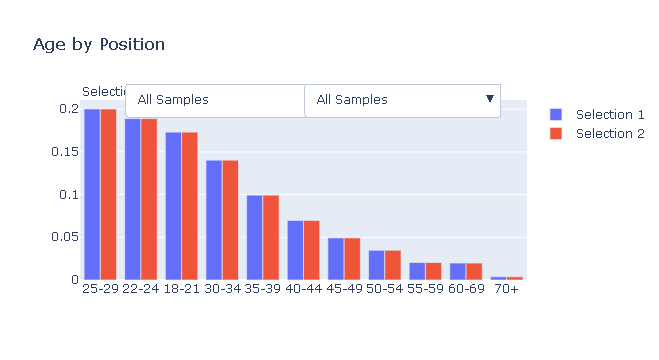

In [51]:
build_graph(Questions['Q1'],Roles,'Age by Position')

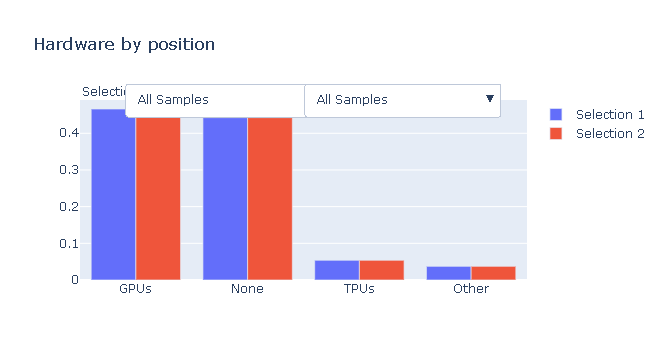

In [52]:
build_graph(Questions['Q12'],Roles,'Hardware by position')